In [165]:
import networkx as nx

In [121]:
G = nx.Graph()

In [122]:
G = nx.DiGraph()

Posso usare un qualsiasi oggetto hashable come nodo.

In [124]:
G = nx.Graph()
G.add_node(1)
G.nodes

In [125]:
# non serve introdurre il nodo esplicitamente
G.add_edge(1, 2)

In [126]:
# posso specificare paramentri, tra cui il peso
G.add_edge(1, 2, weight = 0.9)

In [139]:
# uso stringhe
G = nx.Graph()
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

print(G.nodes)

['a', 'b', 'c', 'd']


In [140]:
# in questo caso, i nodi sono numeri, ma con attributi
G = nx.Graph()
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),

])

print(G.nodes)

[4, 5]


In [29]:
# posso anche usare un altro grafo come nodo! Ottimo per lavorare con sottografi
# ma ricordiamoci che si basa su hash! (non va cambiato una volta introdotto)
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

In [141]:
G.clear()
G.add_edges_from([('A', 'B'), (['A', 'C']), (['C', 'D'])])

In [142]:
# funzioni utili per interrogare il grafo:
print(G.nodes)
print(G.edges)
print(G.adj)
print(G.degree)

['A', 'B', 'C', 'D']
[('A', 'B'), ('A', 'C'), ('C', 'D')]
{'A': {'B': {}, 'C': {}}, 'B': {'A': {}}, 'C': {'A': {}, 'D': {}}, 'D': {'C': {}}}
[('A', 2), ('B', 1), ('C', 2), ('D', 1)]


In [144]:
# iterare tutti gli archi
for u, succ in G.adj.items():
    for v in succ:
        print(f"{u} -> {v}")

A -> B
A -> C
B -> A
C -> A
C -> D
D -> C


In [57]:
G.remove_node('A')
list(G.nodes)

['B', 'C', 'D']

In [127]:
import math
G.add_edge('y', 'x', function=math.cos)

In [71]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]

AtlasView({2: {'color': 'yellow'}})

In [74]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [145]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
# Posso scorrere tutti gli adiacenti con adj.items()
for n, nbrs in FG.adj.items():
    # in questo caso, uso gli adiacenti come un altro dizionario
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5:
            print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [77]:
for (u, v, col) in G.edges.data('color'):
    if col == "red":
        print(f"({u}, {v}, {wt:.3})")

(1, 2, red)


In [80]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))

print(list(DG.successors(1)))

print(list(DG.neighbors(1)))

0.5
1.25
[2]
[2]


In [157]:
G = nx.sedgewick_maze_graph()
print(G.edges)

[(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]


In [158]:
G = nx.complete_bipartite_graph([1, 2, 3], ['A', 'B'])
print(G.edges)

[(1, 'A'), (1, 'B'), (2, 'A'), (2, 'B'), (3, 'A'), (3, 'B')]


In [159]:
G = nx.florentine_families_graph()
print(G.edges)

[('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]


In [160]:
G = nx.sedgewick_maze_graph()
print(G.edges)

[(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]


In [161]:
print(nx.shortest_path(G,3,7))

[3, 4, 7]


In [89]:
import matplotlib.pyplot as plt

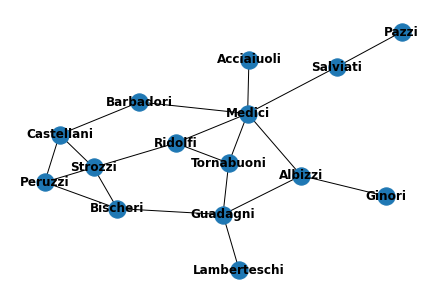

In [153]:
G = nx.florentine_families_graph()
nx.draw(G, with_labels=True, font_weight='bold')

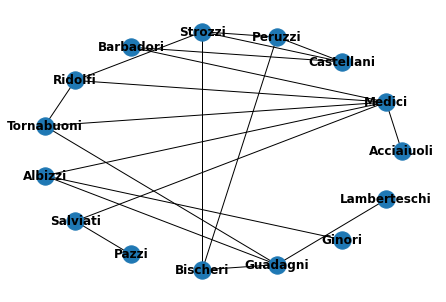

In [154]:
nx.draw_circular(G, with_labels=True, font_weight='bold')

(-2.62, 6.62, -0.081, 0.381)

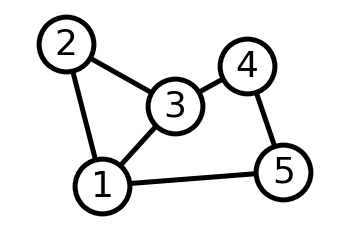

In [155]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (4, 5)])

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

ax = plt.gca() # margine
ax.margins(0.20)
plt.axis("off")

In [166]:
# Esempio originale:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_knuth_miles.html#sphx-glr-auto-examples-drawing-plot-knuth-miles-py


# Lettura file
import gzip
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def miles_graph():
    """Return the cites example graph in miles_dat.txt
    from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)

    fh = gzip.open("knuth_miles.txt.gz", "r")

    G = nx.Graph()
    G.position = {}
    G.population = {}

    cities = []
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue

        numfind = re.compile(r"^\d+")

        if numfind.match(line):  # this line is distances
            dist = line.split()
            for d in dist:
                G.add_edge(city, cities[i], weight=int(d))
                i = i + 1
        else:  # this line is a city, position, population
            i = 1
            (city, coordpop) = line.split("[")
            cities.insert(0, city)
            (coord, pop) = coordpop.split("]")
            (y, x) = coord.split(",")

            G.add_node(city)
            # assign position - Convert string to lat/long
            G.position[city] = (-float(x) / 100, float(y) / 100)
            G.population[city] = float(pop) / 1000.0
    return G

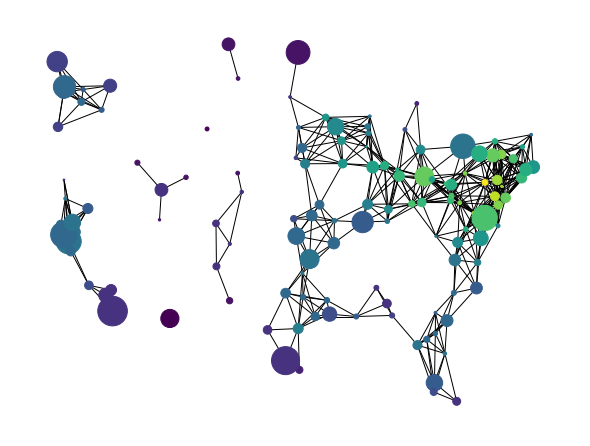

In [172]:
G = miles_graph()

# make new graph of cites, edge if less then 300 miles between them
H = nx.Graph()
for v in G:
    H.add_node(v)
for (u, v, d) in G.edges(data=True):
    if d["weight"] < 300:
        H.add_edge(u, v)

fig = plt.figure(figsize=(8, 6))

# nodes colored by degree sized by population
node_color = [float(H.degree(v)) for v in H]

nx.draw(
    H,
    G.position,
    node_size=[G.population[v] for v in H],
    node_color=node_color,
    with_labels=False,
)